<a href="https://colab.research.google.com/github/nozaripo/Data_Wrangling/blob/master/Stock%20-%20Web%20Scraping%20%26%20Plotly/Stock_Data_Wrangling-Web_Scraping_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Stock Data Wrangling (Extraction, Web Scraping, and Visualization)</h1>


<h2>Objective</h2>

Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this project, we will extract some stock data using both an API and webscraping methods. We will then display this data in an interactive graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>1. Use yfinance to Extract Stock Data</li>
                <ul>
                    <li>Tesla Stock</li>
                    <li>GameStop Stock</li>
                </ul>
        <li>2. Use Webscraping to Extract Revenue Data</li>
                <ul>
                    <li>Tesla</li>
                    <li>GameStop</li>
                </ul>
        <li>3. Visualization & Dashboarding</li>
                <ul>
                    <li>Define a Function that Makes a Graph</li>
                    <li>Tesla and GameStop Graphs</li>
                </ul>
    </ul>
</div>

<hr>


## Required Libraries

In [37]:
#!pip install yfinance==0.1.67
#!mamba install bs4==4.10.0 -y
#!pip install nbformat==4.2.0

!pip install yfinance
!mamba install bs4
!pip install nbformat
!pip install html5lib==1.1 -y
!pip install -U kaleido

/bin/bash: line 1: mamba: command not found

Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -y


In [38]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import kaleido

## Module 1: Use yfinance to Extract Stock Data


### Tesla Stock (`TSLA`)

Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [39]:
tesla_ticker = yf.Ticker("TSLA")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [40]:
tesla_data = tesla_ticker.history(period="max")

**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [41]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


### GameStop Stock (`GME`)

Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [42]:
gamestop_ticker = yf.Ticker("GME")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [43]:
gme_data = gamestop_ticker.history(period="max")

**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [44]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Module 2: Use Webscraping to Extract Revenue Data


### Tesla Revenue

We will use the `requests` library to download and scrape the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm for `TSLA` Revenue data on IBM Cloud.

We will save the text of the response as a variable named `html_data`.


In [45]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text

Parse the html data using `beautiful_soup`.


In [46]:
soup = BeautifulSoup(html_data, "html.parser")

Using `BeautifulSoup` or the `read_html` function, we will extract the table with `Tesla Quarterly Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


**Option 1. Using `BeautifulSoup`:**

- Find the index of the table that contains `Tesla Quarterly Revenue`

In [47]:
# First, find the index of the table that contains `Tesla Quarterly Revenue`
tables = soup.find_all("table")

for i, table in enumerate(tables):
    if "Tesla Quarterly Revenue" in str(table):
        index_table = i

index_table

1

Now let's extract the desired table and store it as a data frame

In [48]:
# Initiate the data frame with column names
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Find all the rows or observations of `Date` and `Revenue` pairs
tesla_table = tables[1]
rows = tesla_table.find_all("tr")

# Run a for-loop and add the realized observations to the empty data frame
for i, row in enumerate(rows):
    cols = row.find_all("td")
    if cols!=[]:
        tesla_revenue = tesla_revenue.append({"Date": cols[0].text, "Revenue": cols[1].text}, ignore_index=True)

# Display the first 5 elements of the data frame
#tesla_revenue.head()

<ipython-input-48-106f4f834aa4>:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-48-106f4f834aa4>:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-48-106f4f834aa4>:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-48-106f4f834aa4>:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-48-106f4f834aa4>:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-48-106f4f834aa4>:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Us

Now we will preprocess the data (get rid of $, NaNs and empty cells).


In [49]:
# First, we will execute the following line to remove the comma and dollar sign from the `Revenue` column.
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

# Executing the following lines to remove an null or empty strings in the Revenue column.
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

<ipython-input-49-94ba234ec7d4>:2: FutureWarning:

The default value of regex will change from True to False in a future version.



Let's take a look at the the last 5 rows of the `tesla_revenue` dataframe.

In [50]:
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


**Option 2. Using `read_html`:**

We can also perform the same scraping task by directly using `pandas` and `pandas.read_html`.

In [51]:
df_htm = pd.read_html(url, match="Tesla Quarterly Revenue", flavor ='bs4')[0]
#pd.read_html(soup)
# population_data_read_html = pd.read_html(str(tables[index_table]), flavor='bs4')[0]
df_htm.tail()

,Tesla Quarterly Revenue (Millions of US $),Tesla Quarterly Revenue (Millions of US $).1
49,2010-06-30,$28
50,2010-03-31,$21
51,2009-12-31,NaN
52,2009-09-30,$46
53,2009-06-30,$27


and here we should do the same preprocessing tasks as in method 1.

### GameStop Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html.

In [52]:
url_gme = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data = requests.get(url_gme).text

Parse the html data using `beautiful_soup`.


In [53]:
soup_gme = BeautifulSoup(html_data, "html.parser")

Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. We will also make sure the comma and dollar signs are removed from the `Revenue` column using a method similar to that for `TSLA`.


We use `read_html` directly.

In [54]:
#pd.read_html(str(tables[table_index]), flavor="bs4")[0] or:
gme_revenue = pd.read_html(url_gme, match="GameStop Quarterly Revenue", flavor="bs4")[0]
gme_revenue.columns = ["Date", "Revenue"]

In [55]:
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(',|\$','')

<ipython-input-55-7df1078fe17a>:1: FutureWarning:

The default value of regex will change from True to False in a future version.



In [56]:
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[ gme_revenue["Revenue"] != '' ]

Display the last five rows of the `gme_revenue` dataframe using the `tail` function.


In [57]:
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


## Module 3: Data Visualization & Dashboarding


We will define a `make_graph` function for plotting purposes through use of `plotly`. The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

### Graphing Function
We will first define the code to plot the data in a graphing function under `make_graph`. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.

In [58]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

### Tesla Data

In [59]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

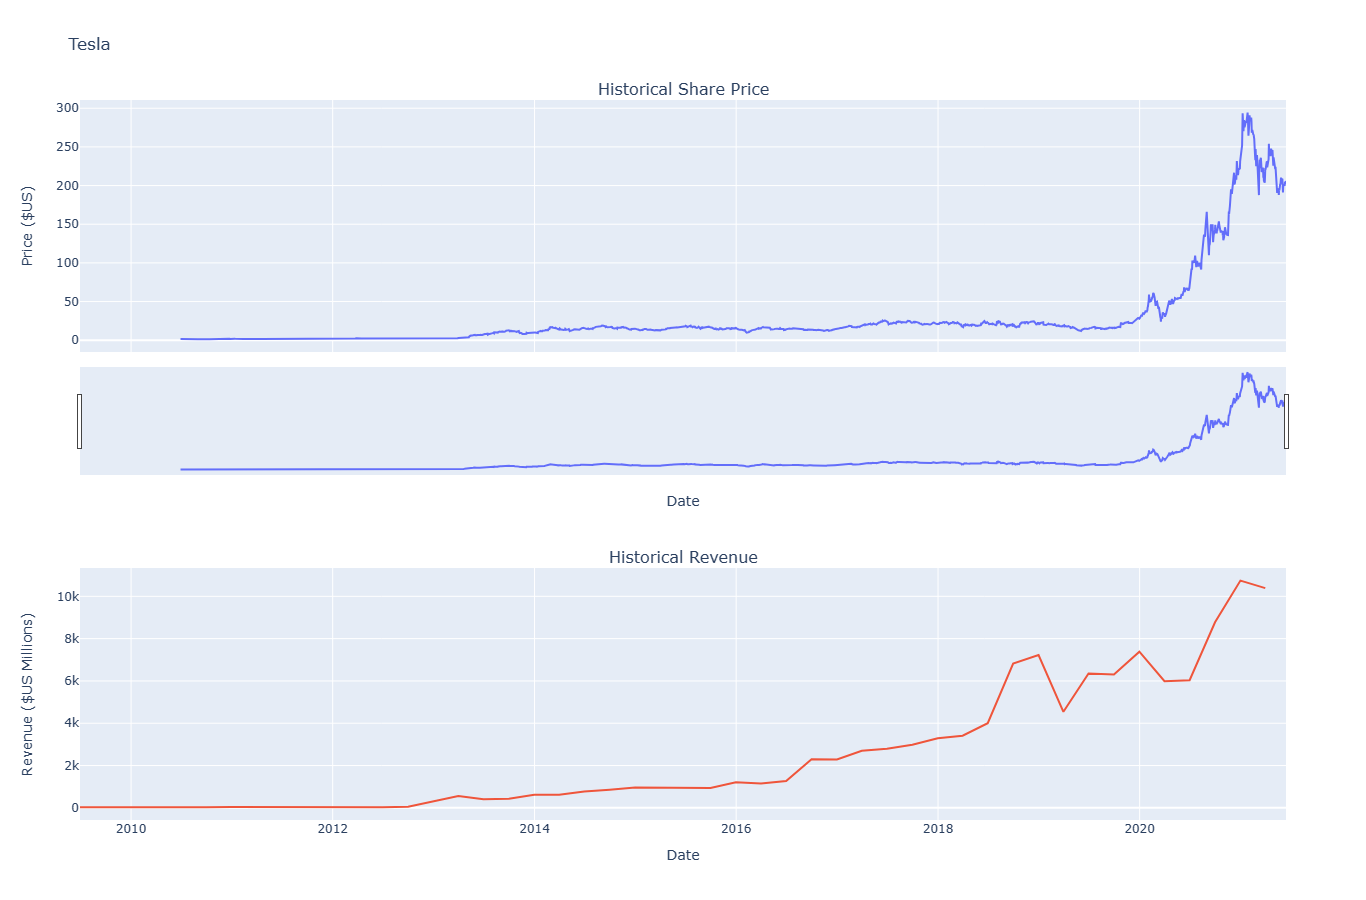

### GameStop Data

In [60]:
make_graph(gme_data, gme_revenue, 'GameStop')

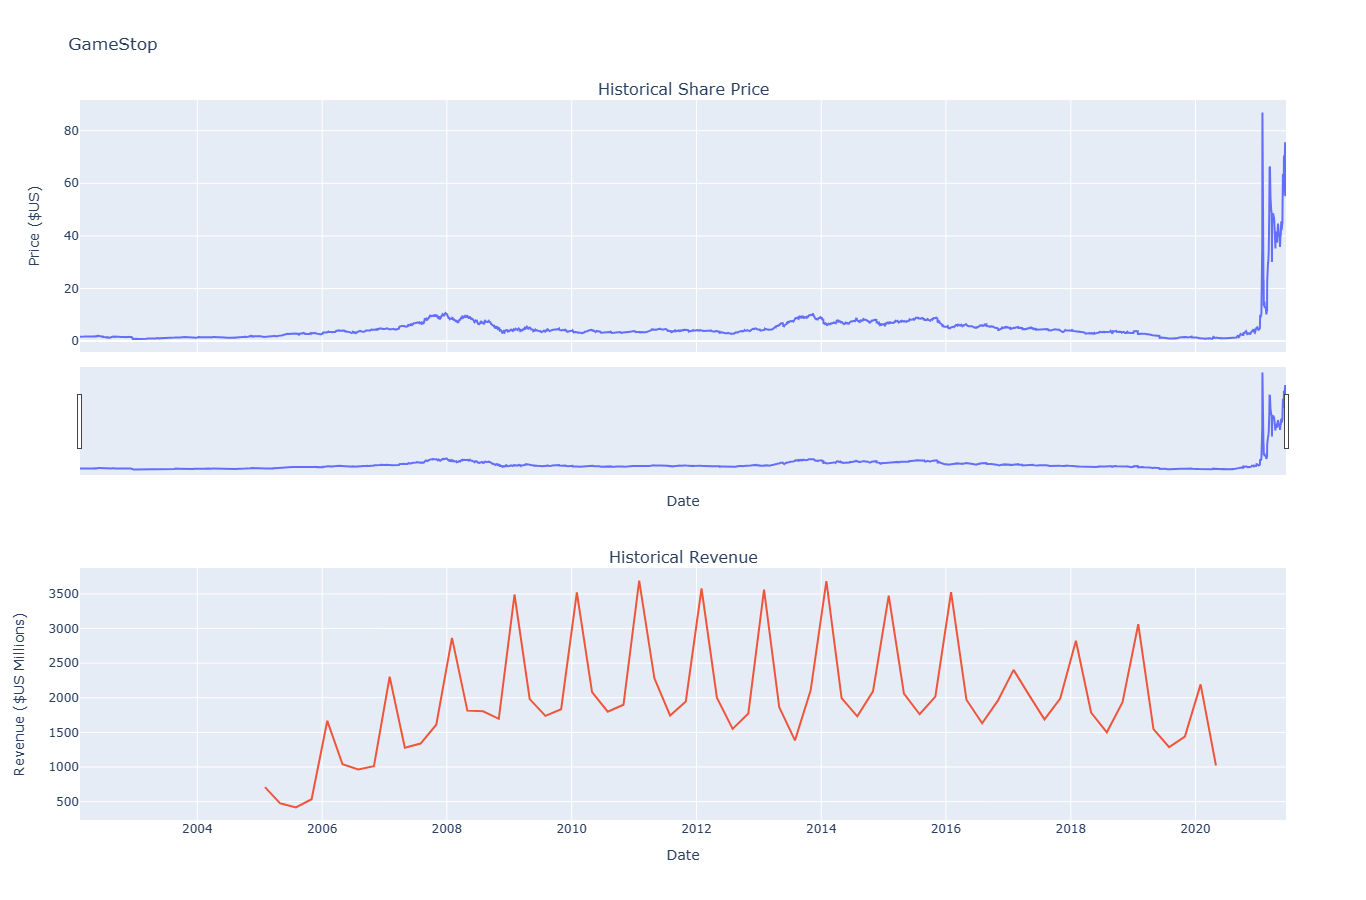


## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
